In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [23]:
data_man = [365502, 368751, 372009, 373810, 375699, 377501, 378468, 379436,
            380491, 381217, 382205, 383230, 383835, 384953, 343570, 345119,
            346621, 348009, 349197, 350038, 350870, 351603, 352236, 352767,
            385266, 387047]

data_woman = [379379, 382171, 384907, 386473, 388385, 389880, 390772, 391557,
              392344, 393068, 394247, 395282, 396560, 397709, 353037, 354563,
              356057, 357518, 358809, 359365, 360180, 360901, 361525, 362049,
              384614, 386541]

In [24]:
index= pd.date_range(start='1996', end='2022', freq='A')
man = pd.Series(data_man, index)
woman = pd.Series(data_woman, index)

In [25]:
data_man

[365502,
 368751,
 372009,
 373810,
 375699,
 377501,
 378468,
 379436,
 380491,
 381217,
 382205,
 383230,
 383835,
 384953,
 343570,
 345119,
 346621,
 348009,
 349197,
 350038,
 350870,
 351603,
 352236,
 352767,
 385266,
 387047]

In [26]:
data_woman

[379379,
 382171,
 384907,
 386473,
 388385,
 389880,
 390772,
 391557,
 392344,
 393068,
 394247,
 395282,
 396560,
 397709,
 353037,
 354563,
 356057,
 357518,
 358809,
 359365,
 360180,
 360901,
 361525,
 362049,
 384614,
 386541]

In [27]:
index

DatetimeIndex(['1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [28]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

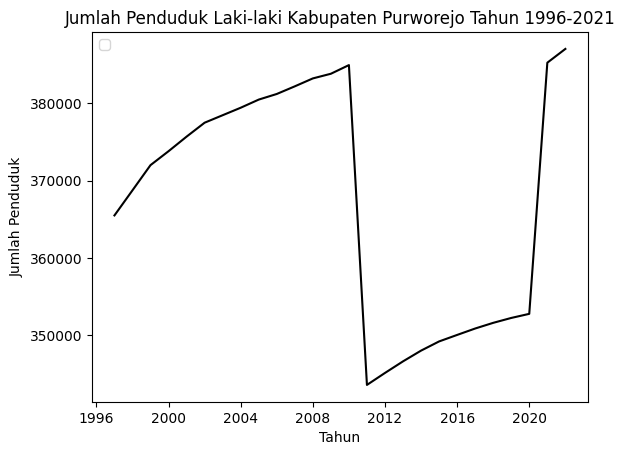

In [29]:
plt.plot(man, color='black')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')
plt.title('Jumlah Penduduk Laki-laki Kabupaten Purworejo Tahun 1996-2021')
plt.legend(loc=2)

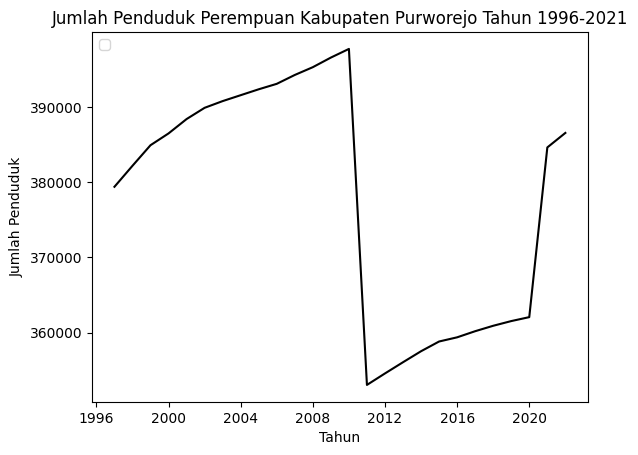

In [30]:
plt.plot(woman, color='black')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')
plt.title('Jumlah Penduduk Perempuan Kabupaten Purworejo Tahun 1996-2021')
plt.legend(loc=2)

**Double Exponential Smoothing Holt**

In [31]:
fit1 = Holt(man).fit()
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
print(fit1.summary())

                              Holt Model Results                              
Dep. Variable:                   None   No. Observations:                   26
Model:                           Holt   SSE                     2955512822.987
Optimized:                       True   AIC                            490.270
Trend:                       Additive   BIC                            495.302
Seasonal:                        None   AICC                           494.691
Seasonal Periods:                None   Date:                 Wed, 24 May 2023
Box-Cox:                        False   Time:                         12:09:05
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
smoothing_trend            0.0236905                

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [32]:
fit1.fittedvalues

1996-12-31    368751.000000
1997-12-31    368690.659495
1998-12-31    371924.535140
1999-12-31    375184.405526
2000-12-31    376960.302358
2001-12-31    378819.005393
2002-12-31    380590.220854
2003-12-31    381511.216890
2004-12-31    382430.064809
2005-12-31    383438.676366
2006-12-31    384113.720016
2007-12-31    385055.162841
2008-12-31    386036.722273
2009-12-31    386591.706020
2010-12-31    387668.263322
2011-12-31    345458.075795
2012-12-31    346780.287155
2013-12-31    348277.633491
2014-12-31    349659.847988
2015-12-31    350837.908796
2016-12-31    351661.738631
2017-12-31    352475.034898
2018-12-31    353187.880752
2019-12-31    353798.842226
2020-12-31    354305.919424
2021-12-31    387374.751566
Freq: A-DEC, dtype: float64

In [33]:
print(fcast1)

2022-12-31    389304.464959
2023-12-31    391560.291161
2024-12-31    393816.117362
2025-12-31    396071.943563
2026-12-31    398327.769765
Freq: A-DEC, Name: Holt's linear trend, dtype: float64


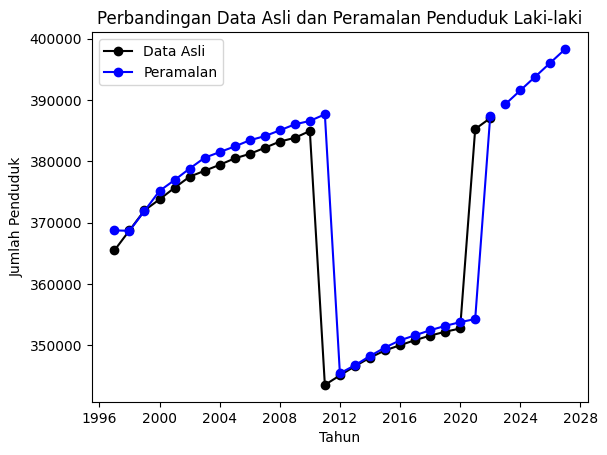

In [34]:
plt.title('Perbandingan Data Asli dan Peramalan Penduduk Laki-laki')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')

# Actual data
plt.plot(man, label='Data Asli',color='black',marker='o')

# Holt's Linear Trend
plt.plot(fcast1,label='Peramalan',color='blue',marker='o')
plt.plot(fit1.fittedvalues,color='blue',marker='o')

plt.legend(loc=2)

In [35]:
fit2 = Holt(woman).fit()
fcast2 = fit2.forecast(5).rename("Holt's linear trend")
print(fit2.summary())

                              Holt Model Results                              
Dep. Variable:                   None   No. Observations:                   26
Model:                           Holt   SSE                     2702162159.462
Optimized:                       True   AIC                            487.940
Trend:                       Additive   BIC                            492.972
Seasonal:                        None   AICC                           492.361
Seasonal Periods:                None   Date:                 Wed, 24 May 2023
Box-Cox:                        False   Time:                         12:09:05
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
smoothing_trend            0.0236905                

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [36]:
fit2.fittedvalues

1996-12-31    382171.000000
1997-12-31    382119.146910
1998-12-31    384898.149926
1999-12-31    387634.573556
2000-12-31    389179.045034
2001-12-31    391070.490143
2002-12-31    392539.410107
2003-12-31    393392.633273
2004-12-31    394134.704798
2005-12-31    394879.269620
2006-12-31    395560.677153
2007-12-31    396706.223162
2008-12-31    397708.204069
2009-12-31    398957.758480
2010-12-31    400077.825488
2011-12-31    354525.938364
2012-12-31    355817.422546
2013-12-31    357316.057293
2014-12-31    358782.005665
2015-12-31    360074.516718
2016-12-31    360617.474528
2017-12-31    361420.802157
2018-12-31    362129.961006
2019-12-31    362740.126645
2020-12-31    363248.266220
2021-12-31    386206.615503
Freq: A-DEC, dtype: float64

In [37]:
print(fcast2)

2022-12-31    388246.654369
2023-12-31    389953.980660
2024-12-31    391661.306952
2025-12-31    393368.633243
2026-12-31    395075.959534
Freq: A-DEC, Name: Holt's linear trend, dtype: float64


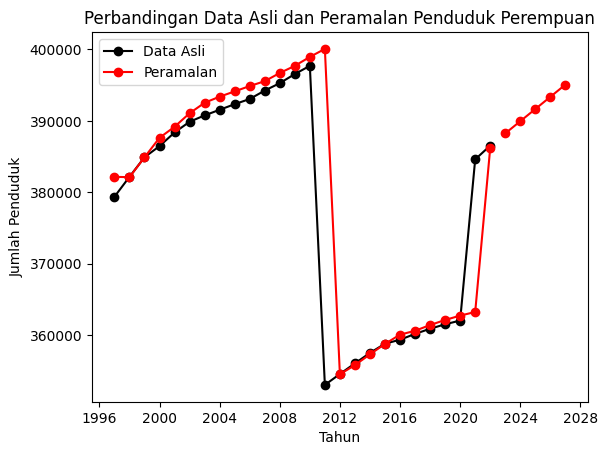

In [38]:
plt.title('Perbandingan Data Asli dan Peramalan Penduduk Perempuan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')

# Actual data
plt.plot(woman,label='Data Asli',color='black',marker='o')

# Holt's Linear Trend
plt.plot(fcast2,label='Peramalan',color='red',marker='o')
plt.plot(fit2.fittedvalues,color='red',marker='o')

plt.legend(loc=2)

**Menghitung Nilai MAPE**

In [39]:
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  mape = np.mean(np.abs((actual - pred)/data_man))*100
  return mape
actual = data_man
pred = fit1.fittedvalues
print('mape :', mape(data_man, fit1.fittedvalues))

mape : 1.1050163591210074


In [40]:
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  mape = np.mean(np.abs((actual - pred)/data_woman))*100
  return mape
actual = data_woman
pred = fit2.fittedvalues
print('mape :', mape(data_woman, fit2.fittedvalues))

mape : 0.9471787283768183


**Perbandingan Hasil Peramalan Penduduk Laki-laki dan Perempuan**

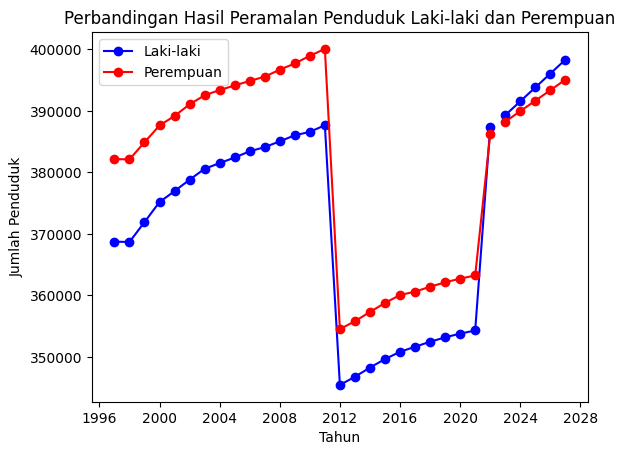

In [41]:
plt.title('Perbandingan Hasil Peramalan Penduduk Laki-laki dan Perempuan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penduduk')

# Hasil Peramalan Penduduk Laki-laki
plt.plot(fcast1,label='Laki-laki',color='blue',marker='o')
plt.plot(fit1.fittedvalues,color='blue',marker='o')

# Hasil Peramalan Penduduk Perempuan
plt.plot(fcast2,label='Perempuan',color='red',marker='o')
plt.plot(fit2.fittedvalues,color='red',marker='o')

plt.legend(loc=2) 